<a href="https://colab.research.google.com/github/FireStrings/MasterDegree/blob/main/EDA/EDA_Curtiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
os.chdir("/content/drive/My Drive/UFSCAR/Notebooks")

Mounted at /content/drive/


In [ ]:
estacao = "curitiba"

In [ ]:
%run UtilsNew.ipynb

In [ ]:
set_plot_size(15, 3)

###Check raw file

In [ ]:
raw_anual_df = load_files(estacao, False)

In [ ]:
raw_anual_df.head()

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/01/2023,0,"20,4","21,1","20,3","88,0","88,0","84,0","18,3","18,3","18,1","912,8","912,8","911,8","2,0","89,0","6,5",NaN,"0,0"
1,01/01/2023,100,"20,3","20,6","20,2","86,0","88,0","85,0","17,9","18,3","17,8","913,3","913,3","912,9","2,2","80,0","5,7",NaN,"0,0"
2,01/01/2023,200,"19,9","20,4","19,9","85,0","86,0","84,0","17,4","17,9","17,3","913,5","913,5","913,3","2,7","86,0","6,7",NaN,"0,0"
3,01/01/2023,300,"19,7","20,0","19,6","88,0","88,0","85,0","17,5","17,6","17,3","912,8","913,5","912,8","2,3","78,0","6,3",NaN,"0,0"
4,01/01/2023,400,"19,8","19,8","19,6","87,0","88,0","87,0","17,5","17,6","17,4","912,5","912,8","912,5","1,6","98,0","4,3",NaN,"0,0"


In [ ]:
raw_anual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  17544 non-null  object
 1   Hora (UTC)            17544 non-null  int64 
 2   Temp. Ins. (C)        17286 non-null  object
 3   Temp. Max. (C)        17276 non-null  object
 4   Temp. Min. (C)        17276 non-null  object
 5   Umi. Ins. (%)         17286 non-null  object
 6   Umi. Max. (%)         17276 non-null  object
 7   Umi. Min. (%)         17276 non-null  object
 8   Pto Orvalho Ins. (C)  17286 non-null  object
 9   Pto Orvalho Max. (C)  17276 non-null  object
 10  Pto Orvalho Min. (C)  17276 non-null  object
 11  Pressao Ins. (hPa)    17286 non-null  object
 12  Pressao Max. (hPa)    17276 non-null  object
 13  Pressao Min. (hPa)    17276 non-null  object
 14  Vel. Vento (m/s)      17279 non-null  object
 15  Dir. Vento (m/s)      17279 non-null

In [ ]:
total = len(raw_anual_df)
count_nulls = raw_anual_df[["Radiacao (KJ/m²)"]].notna().sum().sum()

print(total)
print(count_nulls)
print("Perc nulls:", round((count_nulls/total), 3))

17544
9965
Perc nulls: 0.568


###Check after pre processing

In [ ]:
df = load_files(estacao, True).set_index("data_hora", drop=False)

###Check the hour range

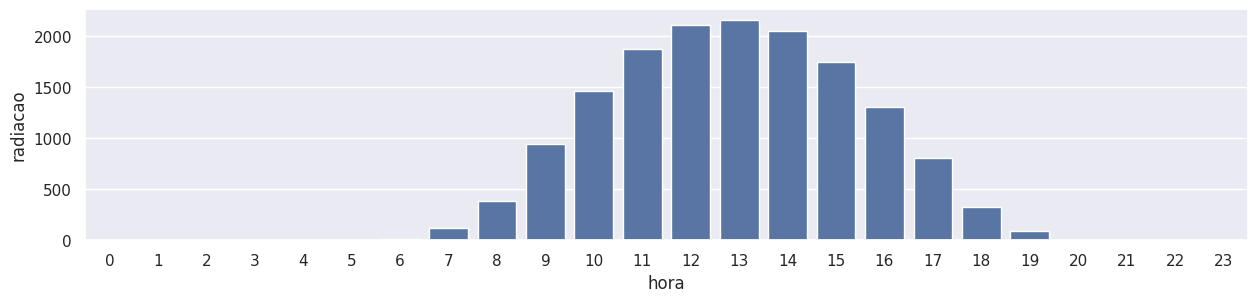

In [ ]:
plot_distrib_horario(df, None, estacao)

In [ ]:
start_hour = 7
end_hour = 19
df = filter_between(df, "hora", start_hour, end_hour)

###Time series

Whats the seasonal interval?

In [ ]:
intervalo_sazonal = get_seasonal_interval(df, start_hour)

In [ ]:
intervalo_sazonal

13

####Stationarity

#####Resample in days

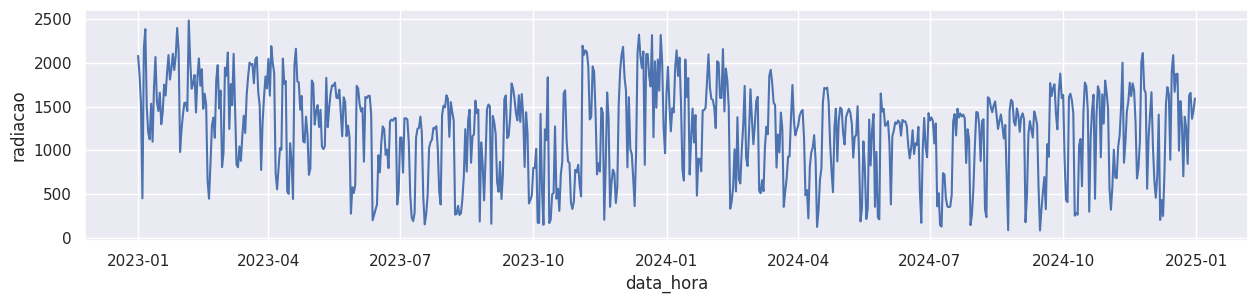

In [ ]:
df_resampled = df[["radiacao", "data_hora"]].set_index("data_hora").resample("D").mean()
plot = sns.lineplot(data=df_resampled, x="data_hora", y="radiacao")

#####Not resampled

<Axes: xlabel='data_hora', ylabel='radiacao'>

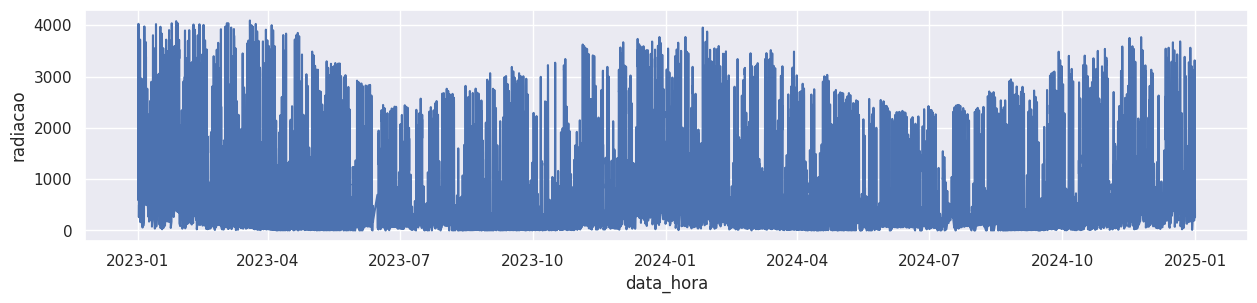

In [ ]:
sns.lineplot(data=df[["radiacao", "data_hora"]].set_index("data_hora"), x="data_hora", y="radiacao")

####Adfuler test

In [ ]:
adfuller_test(df[["radiacao", "data_hora"]].set_index("data_hora"))

Teste estatístico ADF : -11.053013214146416
p-valor : 5.024743007206408e-20
Num Lags : 37
Numero de observações : 8956
Fortes evidências contra a hipotese nula(Ho), ou seja, pode ser rejeitada. Os dados não possuem uma raíz unitária, portanto tem estacionáriedade.


####Decomposition

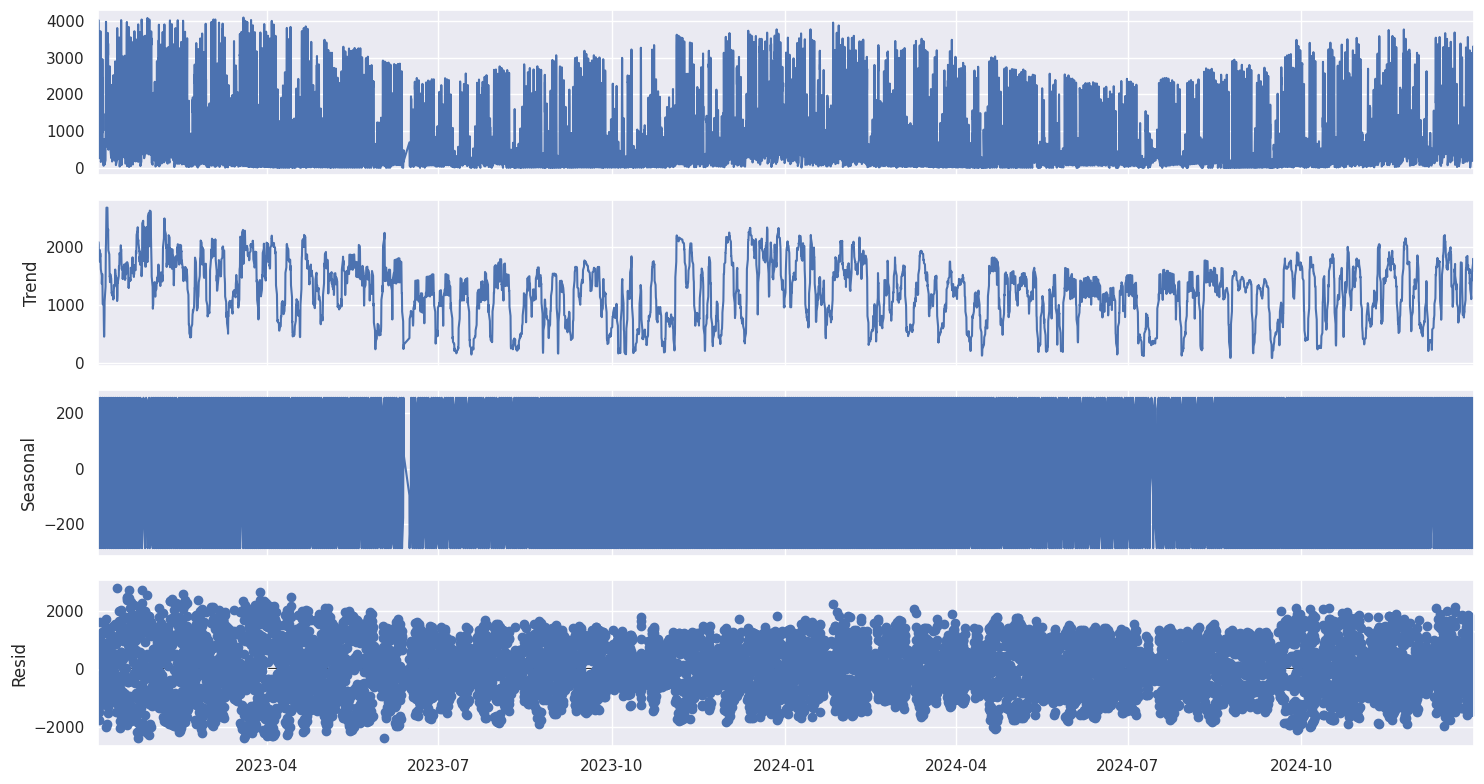

In [ ]:
set_plot_size(15, 8)

df_dec = df[["radiacao", "data_hora"]].set_index('data_hora')

# A variancia não muda ao longo do tempo, a sazonalizadade nao acompanha a tendencia, por isso o modelo aditivo
resultado = seasonal_decompose(df_dec, model="addictive", period=intervalo_sazonal)
ax = resultado.plot()

####ACF and PACF

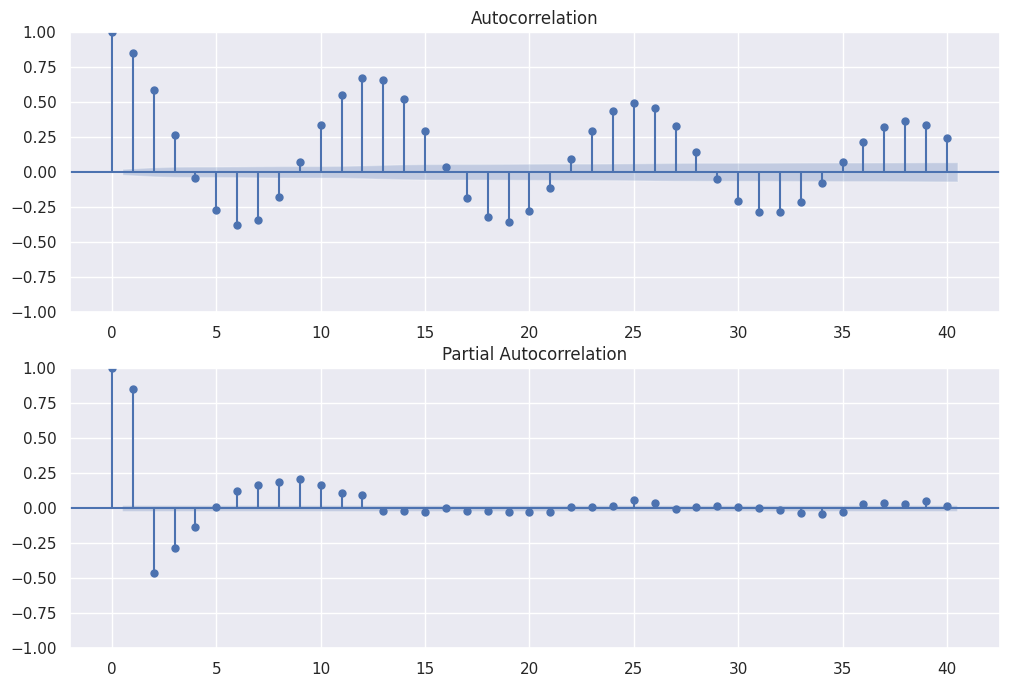

In [ ]:
calculate_acf_pacf(df)